This notebook does not work all the way through

# Import Package

In [12]:
# General Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Package
import pmdarima as pm
from datetime import datetime

#import cufflinks as cf
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import matplotlib.cm as cm
#from dateutil.relativedelta import relativedelta

# Continuous Model Custom Packages
from custom_packages import residuals_vs_fitted, accuracy_table

# Time Series Custom Packages
from custom_packages import remove_date_column, train_test_split_dates, create_dates_days, create_dates_weeks, create_dates_months, df_constructor_predictions
from custom_packages import date_slicer_start, date_slicer_end, date_slicer_window, date_slicer_range, set_date_index, datetime_datatype
from custom_packages import acf_plot, seasonal_plot

# Import Data

In [13]:
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\WeatherProject\\"

#df_2018 = pd.read_csv(str(filepath)+'2018.csv')
#df_2019 = pd.read_csv(str(filepath)+'2019.csv')
#df_2020 = pd.read_csv(str(filepath)+'2020.csv')
#df_2021 = pd.read_csv(str(filepath)+'2021.csv')
allDates = pd.read_csv(str(filepath)+'allDates.csv')

In [14]:
allDates.head()

,Date,Max_Temp,Avg_Temp,Min_Temp,Max_DewPoint,Avg_DewPoint,Min_DewPoint,Max_Humidity,Avg_Humidity,Min_Humidity,Max_Windspeed,Avg_Windspeed,Min_Windspeed,Max_Pressure,Avg_Pressure,Min_Pressure,Precipitation
0,1/1/2018,38,30.8,26,22,11.9,9,64,46.1,33,22,17.3,13,30.4,30.3,30.2,0.11
1,1/2/2018,43,32.8,23,17,12.5,10,63,45.1,26,15,10.3,5,30.4,30.3,30.2,0.00
2,1/3/2018,45,36.8,32,19,14.4,9,59,41.2,23,16,9.5,5,30.2,30.1,30.0,0.00
3,1/4/2018,47,36.0,27,17,12.8,10,56,39.3,25,17,11.0,6,30.2,30.1,30.1,0.00
4,1/5/2018,52,38.0,29,27,15.6,6,73,43.1,20,9,4.5,0,30.3,30.3,30.2,0.00


In [15]:
# Construct binary column for precipitation

allDates.loc[allDates['Precipitation'] < .1, 'Precipitation_Bin'] = 0
allDates.loc[allDates['Precipitation'] > .1, 'Precipitation_Bin'] = 1

# Weather EDA

In [16]:
df = allDates

In [17]:
df.columns

Index(['Date', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_DewPoint',
       'Avg_DewPoint', 'Min_DewPoint', 'Max_Humidity', 'Avg_Humidity',
       'Min_Humidity', 'Max_Windspeed', 'Avg_Windspeed', 'Min_Windspeed',
       'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'Precipitation',
       'Precipitation_Bin'],
      dtype='object')

In [18]:
# Init data and variaables
value = 'Avg_DewPoint'

# Filter to the specific window
investigate = date_slicer_window(df, '2020-01-02','2020-02-02')

# Check specific values by using the value
#check_value = pd.DataFrame()
#check_value = investigate[investigate[value] < 40]

In [19]:
# Compute summary stats
print("Summary Statistics for", value,"column :")
print("Max -", investigate[value].max())
print("Min -", investigate[value].min())
print("Standard Deviation -", investigate[value].std())
print("Average -", investigate[value].mean())
print("Median -", np.percentile(investigate[value],50))

Summary Statistics for Avg_DewPoint column :
Max - 69.9
Min - 21.0
Standard Deviation - 13.372502681135991
Average - 48.91290322580645
Median - 47.2


<AxesSubplot:>

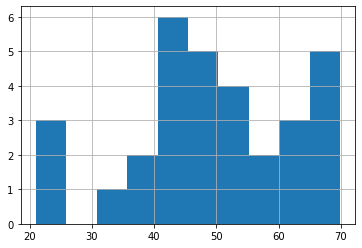

In [20]:
# Histogram
investigate[value].hist()

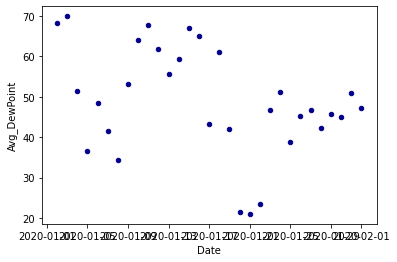

In [21]:
# Scatter Plot. Date and Value column
investigate.reset_index(drop=True, inplace=True)
ax1 = investigate.plot.scatter(x="Date",
                               y=value,
                               c='DarkBlue')

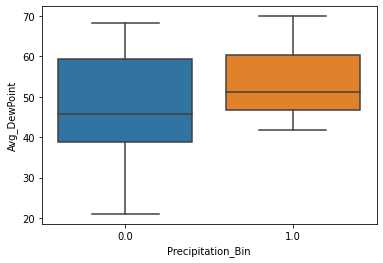

In [22]:
# Box Plot
ax = sns.boxplot(x="Precipitation_Bin", y=value, data=investigate)

# Weather Time Series

In [23]:
# Slice DataFrame to desired date range

# Takes 2 arguments: DF to be sliced, start date
df = date_slicer_start(allDates, '2020-01-31')

In [24]:
df.columns

Index(['Date', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_DewPoint',
       'Avg_DewPoint', 'Min_DewPoint', 'Max_Humidity', 'Avg_Humidity',
       'Min_Humidity', 'Max_Windspeed', 'Avg_Windspeed', 'Min_Windspeed',
       'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'Precipitation',
       'Precipitation_Bin'],
      dtype='object')

In [25]:
# Decide which value column to visualize

# # # # EDIT THIS COLUMN NAME # # # #
value = 'Avg_DewPoint'
# # # # # # # # # # # # # # # # # # #

# Partition the DF to only one value column
columns = ['Date',value]
df = df[columns]

# Set the Date column as the index for the new DF
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [26]:
df.head()

,Avg_DewPoint
Date,
2020-01-31,50.9
2020-02-01,47.2
2020-02-02,41.4
2020-02-03,52.8
2020-02-04,62.4


In [27]:
# Week Function
df1 = pd.DataFrame()
df1[value] = df[value].resample('W').mean()

In [28]:
# Month Function
df1 = pd.DataFrame()
df1[value] = df[value].resample('M').mean()

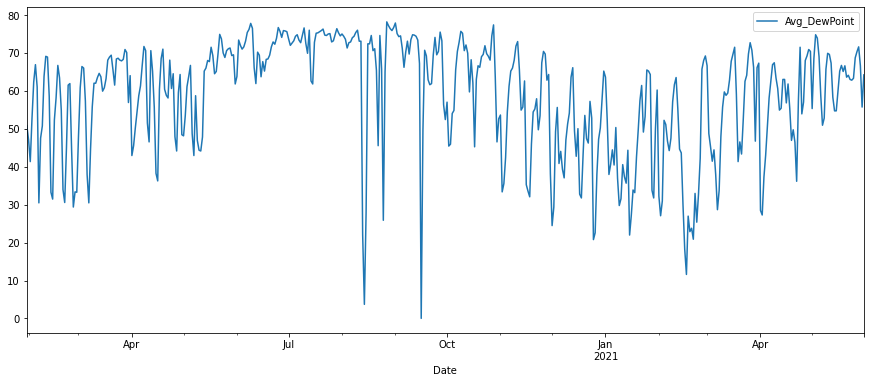

In [29]:
df.plot(figsize=(15, 6))
plt.show()

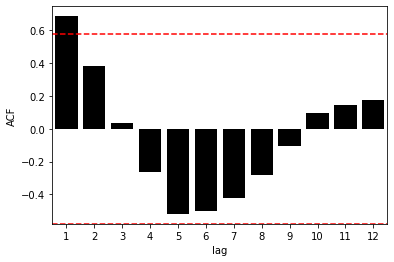

In [30]:
# How to read the ACF Plot?
acf_plot(df1)

In [32]:
seasonal_plot(df1, 10)

UnboundLocalError: local variable 'x' referenced before assignment

# Weather Time Series Prediction

In [33]:
fit = pm.auto_arima(df1, seasonal=True, 
                    stepwise=True, error_action="ignore", 
                    m=12, max_order=6)
print(fit.summary())

ValueError: shapes (4,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [ ]:
points_to_predict = 5
predicted = fit.predict(points_to_predict)

In [ ]:
# Create Date column
date = create_dates_weeks(df1, points_to_predict)
# Merge Date column and predictions
predictions = df_constructor_predictions(date, predicted)
# Set Date column as index
predictions = date_index(predictions)

In [ ]:
# Plot input data + prediction on graph
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
axes.plot(df1, color="blue")
axes.plot(predictions, color="green")

# VAR

In [ ]:
# Most of this is not tested/working
# Not sure of correct dataset to run through
# Why am i graphing this twice in the same workflow?
# Code may be out of order


In [ ]:
test = df_2018

test = datetime_datatype(test)
test = date_index(test)

In [ ]:
from statsmodels.tsa.api import VAR

num_vars = test.shape[1]
fig, axes = plt.subplots(num_vars ,1, figsize=(20, 16))
for i in range(num_vars):
    col = test.columns[i]
    axes[i].plot(test[col])
    #Removing ticks as they are very cluttered
    axes[i].set_xticks([],[])
    axes[i].set_title(col)

In [ ]:
model = VAR(test)
var_selected = model.select_order(maxlags=10)
var_selected.summary()

In [ ]:
model_fitted = model.fit(3)
model_fitted.summary()
points_to_predict = 10
predicted = model_fitted.forecast(forecast_input, points_to_predict)

In [ ]:
lag_order = model_fitted.k_ar
forecast_input = test.values[-lag_order:]

In [ ]:
# Create Date column
date = create_dates_days(test, points_to_predict)

In [ ]:
# Merge Date column and predictions
predictions = df_constructor_predictions(date, predicted)
# Set Date column as index
predictions = date_index(predictions)

In [ ]:
fig, axes = plt.subplots(num_vars ,1, figsize=(16, 12))
for i in range(num_vars):
    col = test.columns[i]
    axes[i].plot(test[col], color="blue")
    axes[i].plot(predicted_index,predicted[:,i], color="green")
    #Removing ticks as they are very cluttered
    axes[i].set_xticks([],[])
    axes[i].set_title(col)

# Appendix A: Background Info

__Stationarity__
- a stationary time series is one whose properties do not depend on the time at which the series is observed
- stationary is a short way of saying that the mean and variance of the series do not vary over time
- a time series for which there is no trend and no seasonality
- a time series showing cyclical behavior can be said to be stationary, as the length of said cycles are stochastic and unknown


__Trend__

__Seasonality__

__Cyclical__ 


## __ARIMA__ 
Auto Regressive Integrated Moving Average
- Integrates differencing into the modeling process

- 3 Parts: __P__, __D__, __Q__
- __p__ - autoregressive part (regression upon oneself). number of lagged values of y(t) to use as predictors
- __d__ - the degree of differencing initially performed on the data.  Apply on input data, or first order diff, etc.
- __q__ - weighted average of the past q forecast __errors__

## How to Read ACF Plot
- Y axis is value for autocorrelation function
- X axis is the lag value
- Dotted lines are the 95% confidence interval (inside the lines)
- If bars extend outside of the confidence interval, there is evidence of autocorrelation
- One way to fix autocorrelation, and therefore force stationarity, is to difference the values
- At time T(1), subtract time T(0) <- called first difference, sometimes more than first or transformation (log) may be necessary

# Appendix B: Project Info

Break out all of this code

- Have a Notebook that houses packages, functions, initial time series plots, descriptive statistics
- Have a Spyder that houses packages, functions, modeling, post prediction work

# Additional Functions

- accept a current date and go back [integer] number of days
- accept a start date and go back [integer] number of days

In [ ]:
current_date = datetime.today()
current_date


Date = datetime.strptime(current_date, "%Y%m%d")
Date


from datetime import timedelta

integer = 10
start_date = '2020-01-31'

end_date = start_date + timedelta(days=integer)

end_date

from datetime import datetime
from datetime import timedelta

StartDate = "20100103"

Date = datetime.strptime(StartDate, "%Y%m%d")
EndDate = Date + timedelta(days=10)


from datetime import datetime
from datetime import timedelta

start_date = '2020-01-31'

start_date = datetime.strptime(start_date, "%Y%m%d")
EndDate = start_date + timedelta(days=10)